In [ ]:
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Video
from collections import defaultdict

sns.set_palette('Set2')

amass_path = '/mnt/Alfheim/Data/AMASS'

The dataset provides 11259 poses from MoCap which were normalized through MoSH++

In [ ]:
npz_list = [l.strip() for l in open(osp.join(amass_path, 'npz.lst')).readlines()]
len(npz_list)

The data provided for each animation consists of the following field:
- trans
- gender
- mocap_framerate
- betas
- dmpls
- poses

In [3]:
sample_data = np.load(osp.join(amass_path, npz_list[0]))
print(f"Translation:      {sample_data['trans'].shape}")
print(f"Gender:           {str(sample_data['gender'])}")
print(f"MoCap Framerate:  {int(sample_data['mocap_framerate'])}")
print(f"Betas:            {sample_data['betas'].shape}")
print(f"DMPLs:            {sample_data['dmpls'].shape}")
print(f"Poses:            {sample_data['poses'].shape}")

Translation:      (360, 3)
Gender:           female
MoCap Framerate:  120
Betas:            (16,)
DMPLs:            (360, 8)
Poses:            (360, 156)


As with any dataset, there are files which cannot be load or are in an incompatible format. Fortunately, the list is short and only 26/11259 cannot be loaded.

In [4]:
trouble_npz_list = []
for entry_npz in npz_list:
    try:
        data = np.load(osp.join(amass_path, entry_npz))
    except:
        trouble_npz_list.append(entry_npz)
print(f"Troubled files: {len(trouble_npz_list)} / {len(npz_list)}")

Exception ignored in: <function NpzFile.__del__ at 0x7fc72b7d6c20>
Traceback (most recent call last):
  File "/home/zal/anaconda3/envs/amass/lib/python3.7/site-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/home/zal/anaconda3/envs/amass/lib/python3.7/site-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'
Exception ignored in: <function NpzFile.__del__ at 0x7fc72b7d6c20>
Traceback (most recent call last):
  File "/home/zal/anaconda3/envs/amass/lib/python3.7/site-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/home/zal/anaconda3/envs/amass/lib/python3.7/site-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


Troubled files: 26 / 11259


In [6]:
print('\n'.join(trouble_npz_list))

CMU/CMU/29/29_01_poses.npz
CMU/CMU/29/29_04_poses.npz
CMU/CMU/29/29_08_poses.npz
CMU/CMU/29/29_10_poses.npz
CMU/CMU/29/29_17_poses.npz
CMU/CMU/79/79_11_poses.npz
CMU/CMU/79/79_18_poses.npz
CMU/CMU/79/79_25_poses.npz
CMU/CMU/79/79_48_poses.npz
CMU/CMU/79/79_51_poses.npz
CMU/CMU/79/79_56_poses.npz
CMU/CMU/79/79_58_poses.npz
CMU/CMU/79/79_59_poses.npz
CMU/CMU/79/79_74_poses.npz
CMU/CMU/79/79_83_poses.npz
CMU/CMU/79/79_84_poses.npz
CMU/CMU/79/79_85_poses.npz
CMU/CMU/79/79_89_poses.npz
CMU/CMU/79/79_95_poses.npz
CMU/CMU/140/140_01_poses.npz
CMU/CMU/140/140_02_poses.npz
CMU/CMU/140/140_04_poses.npz
CMU/CMU/140/140_06_poses.npz
CMU/CMU/140/140_07_poses.npz
CMU/CMU/140/140_08_poses.npz
CMU/CMU/140/140_09_poses.npz


In [8]:
gender_list = []
framerate_list = []
poses_len_list = []
for entry_npz in npz_list:
    if entry_npz in trouble_npz_list:
        continue
    data = np.load(osp.join(amass_path, entry_npz), allow_pickle=True)
    if 'gender' in data:
        gender_list.append(str(data['gender']))
    if 'mocap_framerate' in data:
        framerate_list.append(int(data['mocap_framerate']))
    if 'poses' in data:
        poses_len_list.append(data['poses'].shape[0])

## Gender Stats

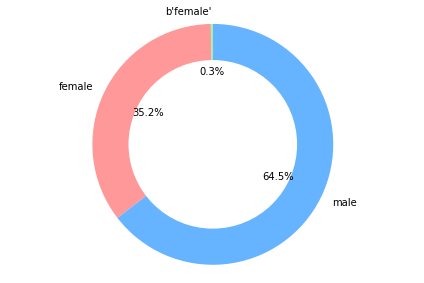

In [43]:
genders = set(gender_list)
gender_count = defaultdict(int)
for g in gender_list:
    gender_count[g] += 1
    
sizes = [gender_count[g] for g in genders]

#colors
colors = ['#99ff99','#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=genders, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Framerate Stats

(array([ 614.,    0., 4620., 5923.,    9.,    0.,    0.,    0.,    0.,
          57.]),
 array([ 59. ,  78.1,  97.2, 116.3, 135.4, 154.5, 173.6, 192.7, 211.8,
        230.9, 250. ]),
 <a list of 10 Patch objects>)

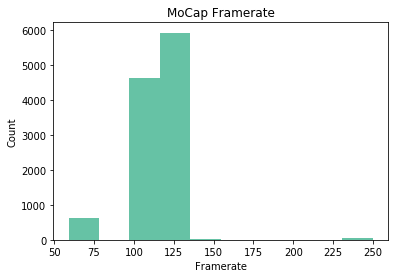

In [37]:
plt.title('MoCap Framerate')
plt.xlabel('Framerate')
plt.ylabel('Count')
plt.hist(framerate_list)

Min len:   1
Max len:   26363
Mean len:  1427.8813151563752
Len Std:   1936.789803313185


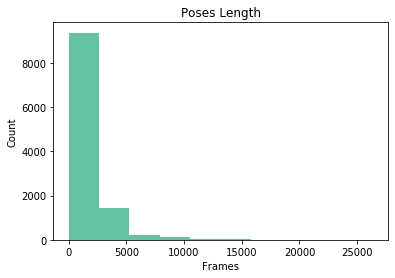

In [38]:
plt.hist(poses_len_list)
plt.xlabel('Frames')
plt.ylabel('Count')
plt.title('Poses Length')
print(f"Min len:   {np.min(poses_len_list)}")
print(f"Max len:   {np.max(poses_len_list)}")
print(f"Mean len:  {np.mean(poses_len_list)}")
print(f"Len Std:   {np.std(poses_len_list)}")